In [25]:
# 원본이미지를 벡터 차원으로 축소해서 은닉레이어에서 주요 특징을 추출(인코더)
# 인코더에서 추출한 핵심정보를 학습해서 최대한 원본 이미지와 비슷하게 복원(디코더)

# 원본을 정답으로 생각, 주요 특징만을 가지고 최대한 가까운 이미지를 찾는행위고.. 이러한 은닉레이어를 사용하면
# 원본 이미지가 가지고 있는 정보를 충분히 설명

In [26]:
# 데이터는 fashion mnist로 사용
# 라이브러리 설정

In [105]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.datasets import fashion_mnist

In [106]:
# 랜덤시드를 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [107]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 차원추가  2차원 3차원
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [100]:
x_train.shape[1:]

(28, 28, 1)

In [117]:
from tensorflow.python import metrics
# 오토 인코더 모델 정의 
def Autoencoder():

    model = Sequential()

    # Encoder 부분
    model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                     activation='relu', input_shape=[28, 28, 1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu')) 

    # Decoder 부분
    model.add(Dense(units=28*28, activation='sigmoid'))   
    model.add(Reshape((28, 28)))     

    # Compile 
    model.compile(optimizer='adam', 
                  loss='mean_squared_error',metrics=['acc'])

    return model  

ae_model = Autoencoder()
ae_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 2704)              0         
                                                                 
 dense_34 (Dense)            (None, 64)                173120    
                                                                 
 dense_35 (Dense)            (None, 784)               50960     
                                                                 
 reshape_11 (Reshape)        (None, 28, 28)            0         
                                                     

In [118]:
history = ae_model.fit(x_train,x_train, batch_size=64, epochs=20,
                        validation_data=(x_test, x_test),
                        verbose=0)

ae_images = ae_model.predict(x_test)
ae_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28)

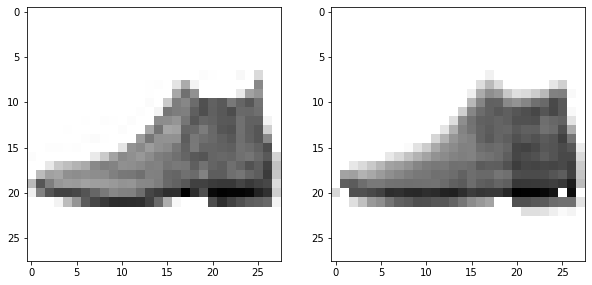

In [119]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.squeeze(x_test[0]),cmap='gray_r')
ax[1].imshow(ae_images[0],cmap='gray_r')

In [126]:
# mnist 영상을 오토 인코딩 해 보기
from tensorflow.keras.datasets import mnist

In [129]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 표준화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#차수변경(증가)
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)


In [130]:
model = Autoencoder()

In [131]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
hist = model.fit(x_train,x_train,batch_size=32,epochs=10,validation_data=(x_test,x_test),callbacks=[earlyStop]  )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - val_loss: 0.0123
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [132]:
predict = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


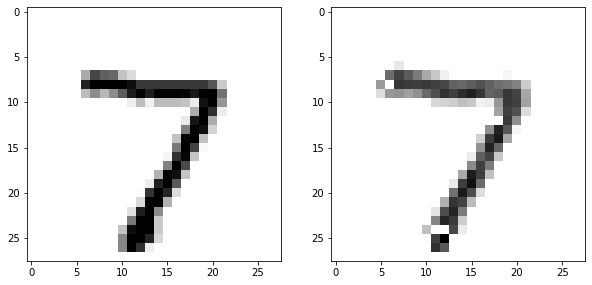

In [134]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.squeeze(x_test[0]),cmap='gray_r')
ax[1].imshow(predict[0],cmap='gray_r')

In [157]:
print(x_test.shape)
noise = np.random.normal(loc=0.0,scale=0.15,size = x_test.shape)

(10000, 28, 28, 1)


In [158]:
x_test_noise =  x_test + noise

(10000, 28, 28)


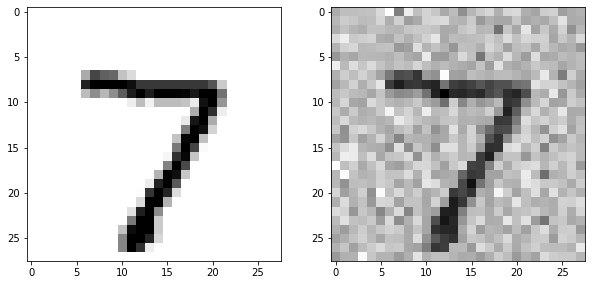

In [159]:
x_test_noise = np.squeeze( x_test_noise)
print(x_test_noise.shape)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(np.squeeze(x_test[0]),cmap='gray_r')
ax[1].imshow(x_test_noise[0],cmap='gray_r')

313/313 [==============================] - 1s 2ms/step


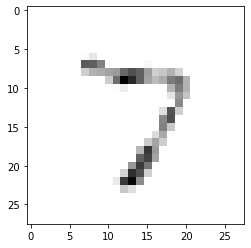

In [160]:
predict_noise =  model.predict(np.expand_dims( x_test_noise, axis=-1))
plt.imshow(predict_noise[0],cmap='gray_r')

In [161]:
from tensorflow.keras.datasets import cifar10

In [162]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
# 표준화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [163]:
x_train.shape

(50000, 32, 32, 3)

In [164]:
# 오토 인코더 모델 정의 
def Autoencoder():

    model = Sequential()

    # Encoder 부분
    model.add(Conv2D(filters=16, kernel_size=(3, 3), 
                     activation='relu', input_shape=[32, 32, 3]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu')) 

    # Decoder 부분
    model.add(Dense(units=32*32*3, activation='sigmoid'))   
    model.add(Reshape((32,32,3)))     

    # Compile 
    model.compile(optimizer='adam', 
                  loss='mean_squared_error',metrics=['acc'])

    return model  

model = Autoencoder()
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 3600)              0         
                                                                 
 dense_38 (Dense)            (None, 64)                230464    
                                                                 
 dense_39 (Dense)            (None, 3072)              199680    
                                                                 
 reshape_13 (Reshape)        (None, 32, 32, 3)         0         
                                                     

In [166]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
hist = model.fit(x_train,x_train,batch_size=64,epochs=100,validation_data=(x_test,x_test),callbacks=[earlyStop]  )

Epoch 1/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7110 - val_loss: 0.0137 - val_acc: 0.7089
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7114 - val_loss: 0.0138 - val_acc: 0.7137
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7116 - val_loss: 0.0136 - val_acc: 0.7168
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7121 - val_loss: 0.0137 - val_acc: 0.7129
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7123 - val_loss: 0.0136 - val_acc: 0.7192
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0136 - acc: 0.7126 - val_loss: 0.0136 - val_acc: 0.7203
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.0135 - acc: 0.7127 - val_loss: 0.0136 - val_acc: 0.7149
Epoch 8/100
782/782 [==============================] - 4s 5ms/step - 

In [167]:
predict = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


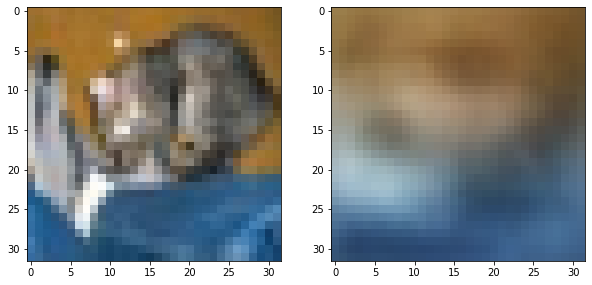

In [168]:
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(x_test[0],cmap='gray_r')
ax[1].imshow(predict[0],cmap='gray_r')